In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install -q split-folders

## Thêm các thư viện

In [2]:

import os
import zipfile
import splitfolders 
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [4]:
# chia dữ liệu thành 3 tệp train test val với tỉ lệ 8:1:1
splitfolders.ratio("../BAOCAO/input/AIKOI", output="../BAOCAO/output", seed=100, ratio=(.8, .1, .1), group_prefix=None) 

In [19]:
# Tạo tên và đường dẫn file dữ liệu để đọc dữ liệu nhanh hơn khi traning

Benigoi_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Benigoi')
Chagoi_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Chagoi')
Goromo_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Goromo')

Hi_Utsuri_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Hi_Utsuri')
Hikarimoyo_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Hikarimoyo')
Kikusui_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Kikusui')


Showa_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Showa')
Shusui_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Shusui')
Tancho_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Tancho')

Utsuri_ki_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Utsuri_ki')
Utsuri_shiro_dir = os.path.join('/content/drive/MyDrive/AI/output/train/Utsuri_shiro')
asagi_dir = os.path.join('/content/drive/MyDrive/AI/output/train/asagi')

bekko_dir = os.path.join('/content/drive/MyDrive/AI/output/train/bekko')
goshiki_dir = os.path.join('/content/drive/MyDrive/AI/output/train/goshiki')
kohaku_dir = os.path.join('/content/drive/MyDrive/AI/output/train/kohaku')

kumonryu_dir = os.path.join('/content/drive/MyDrive/AI/output/train/kumonryu')
ochiba_dir = os.path.join('/content/drive/MyDrive/AI/output/train/ochiba')
sanke_dir = os.path.join('/content/drive/MyDrive/AI/output/train/sanke')




print('\n')
Benigoi_dir_files = os.listdir(Benigoi_dir)
Chagoi_dir_files = os.listdir(Chagoi_dir)
Goromo_dir_files = os.listdir(Goromo_dir)

Hi_Utsuri_dir_files = os.listdir(Hi_Utsuri_dir)
Hikarimoyo_dir_files = os.listdir(Hikarimoyo_dir)
Kikusui_dir_files = os.listdir(Kikusui_dir)

Showa_dir_files = os.listdir(Showa_dir)
Shusui_dir_files = os.listdir(Shusui_dir)
Tancho_dir_files = os.listdir(Tancho_dir)

Utsuri_ki_dir_files = os.listdir(Utsuri_ki_dir)
Utsuri_shiro_dir_files = os.listdir(Utsuri_shiro_dir)
asagi_dir_files = os.listdir(asagi_dir)

bekko_dir_files = os.listdir(bekko_dir)
goshiki_dir_files = os.listdir(goshiki_dir)
Chagoi_files = os.listdir(kohaku_dir)

kumonryu_dir_files = os.listdir(kumonryu_dir)
ochiba_dir_files = os.listdir(ochiba_dir)
sanke_dir_files = os.listdir(sanke_dir)


### Visualization

In [20]:
#to plot images get complete paths for images
pic_index = 10

#get paths for some of the immages from each folder
Benigoi_fewimg = [os.path.join(Benigoi_dir,fname) for fname in Benigoi_dir_files[pic_index-10:pic_index]]
Chagoi_fewimg = [os.path.join(Chagoi_dir,fname) for fname in Chagoi_dir_files[pic_index-10:pic_index]]
Goromo_fewimg = [os.path.join(Goromo_dir,fname) for fname in Goromo_dir_files[pic_index-10:pic_index]]

Hi_utsuri_fewimg = [os.path.join(Hi_Utsuri_dir,fname) for fname in Hi_Utsuri_dir_files[pic_index-10:pic_index]]
Hikarimoyo_fewimg = [os.path.join(Hikarimoyo_dir,fname) for fname in Hikarimoyo_dir_files[pic_index-10:pic_index]]
Kikusui_fewimg = [os.path.join(Kikusui_dir,fname) for fname in Kikusui_dir_files[pic_index-10:pic_index]]

Showa_fewimg = [os.path.join(Showa_dir,fname) for fname in Showa_dir_files[pic_index-10:pic_index]]
Shushui_fewimg = [os.path.join(Shusui_dir,fname) for fname in Shusui_dir_files[pic_index-10:pic_index]]
Tancho_fewimg = [os.path.join(Tancho_dir,fname) for fname in Tancho_dir_files[pic_index-10:pic_index]]

Utsuri_ki_fewimg = [os.path.join(Utsuri_ki_dir,fname) for fname in Utsuri_ki_dir_files[pic_index-10:pic_index]]
Utsuri_shiro_fewimg = [os.path.join(Utsuri_shiro_dir,fname) for fname in Utsuri_shiro_dir_files[pic_index-10:pic_index]]
Asagi_fewimg = [os.path.join(asagi_dir,fname) for fname in asagi_dir_files[pic_index-10:pic_index]]

Bekko_fewimg = [os.path.join(bekko_dir,fname) for fname in bekko_dir_files[pic_index-10:pic_index]]
Godhiki_fewimg = [os.path.join(goshiki_dir,fname) for fname in goshiki_dir_files[pic_index-10:pic_index]]
Kohuku_fewimg = [os.path.join(kohaku_dir,fname) for fname in Chagoi_files[pic_index-10:pic_index]]

kumonryu_fewimg = [os.path.join(kumonryu_dir,fname) for fname in kumonryu_dir_files[pic_index-10:pic_index]]
ochiba_fewimg = [os.path.join(ochiba_dir,fname) for fname in ochiba_dir_files[pic_index-10:pic_index]]
sanke_fewimg = [os.path.join(sanke_dir,fname) for fname in sanke_dir_files[pic_index-10:pic_index]]

(720, 1280, 3)


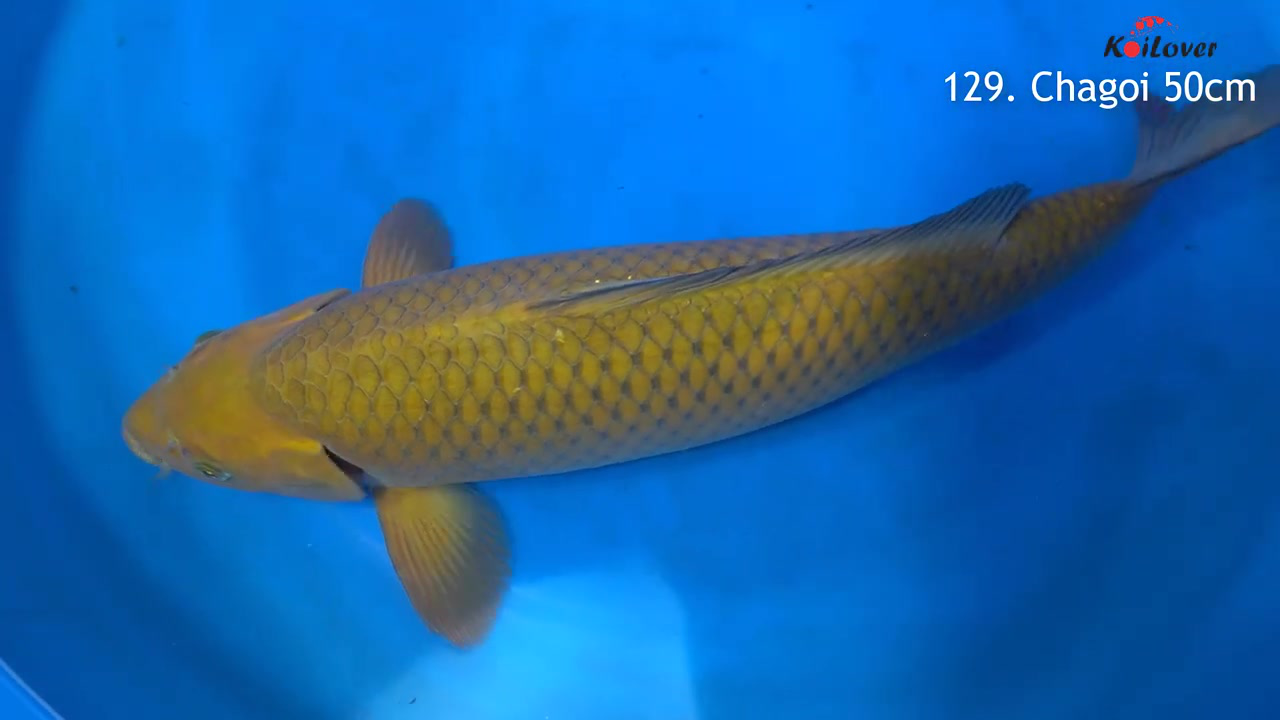

In [24]:
#plot random image 
import PIL.Image as Image

print(cv2.imread(Chagoi_fewimg[0]).shape)
Image.open(Chagoi_fewimg[0])

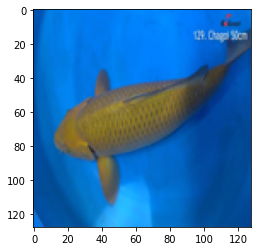

In [25]:
ima = Image.open(Chagoi_fewimg[0]).resize((128,128))
plt.imshow(ima) 

In [29]:
#chuyển đổi BGR image to RGB
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)


In [30]:
#in một số hình ảnh 
def plot_img(imgpath_list):

  fig, ax = plt.subplots(3,3,figsize=(10,10))
  k = 0
  for j in range(3):
    for i in range(3):
        img = cv2.resize(cv2.imread(imgpath_list[k]),(128,128))
        k=k+1
        ax[i,j].imshow(cvtRGB(img));
        ax[i,j].axis('off');

				 Benigoi


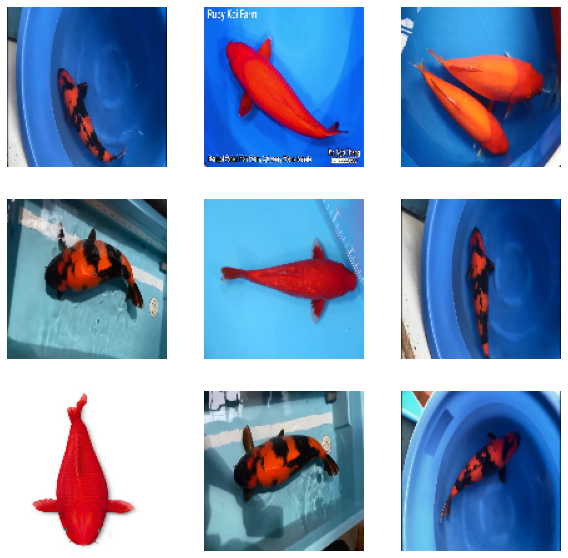

In [31]:
print('\t\t\t\t Benigoi')
plot_img(Benigoi_fewimg)

				Tancho


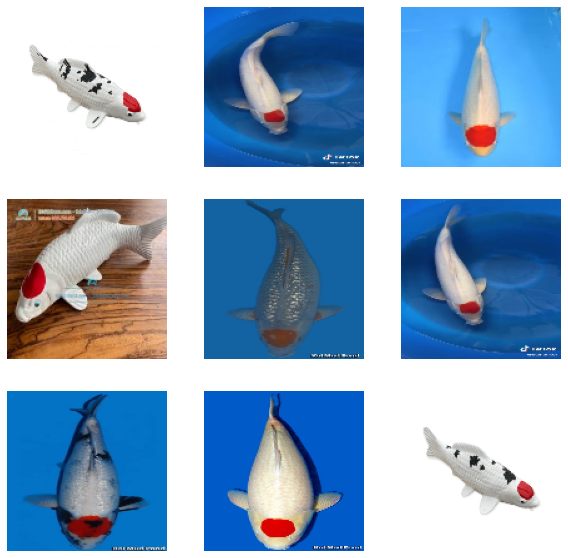

In [32]:
print('\t\t\t\tTancho')
plot_img(Tancho_fewimg)

				 bekko


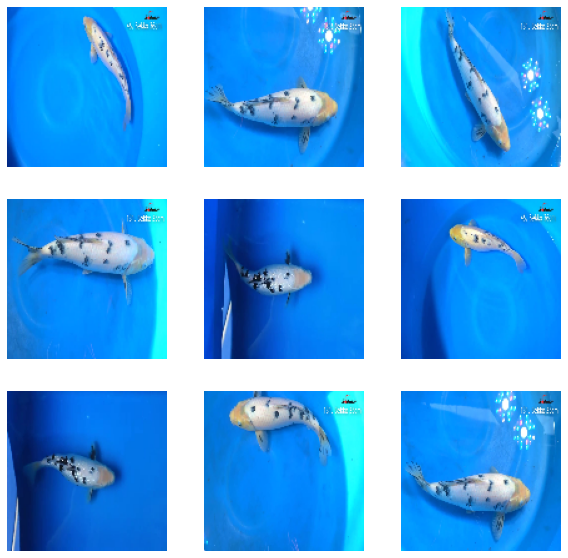

In [33]:
print('\t\t\t\t bekko')
plot_img(Bekko_fewimg)

				 Hi utsuri


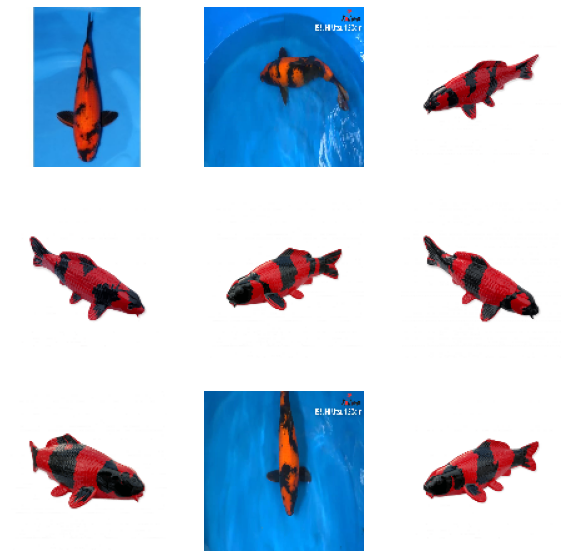

In [41]:
print('\t\t\t\t Hi utsuri')
plot_img(Hi_utsuri_fewimg)

				Doitsu_none


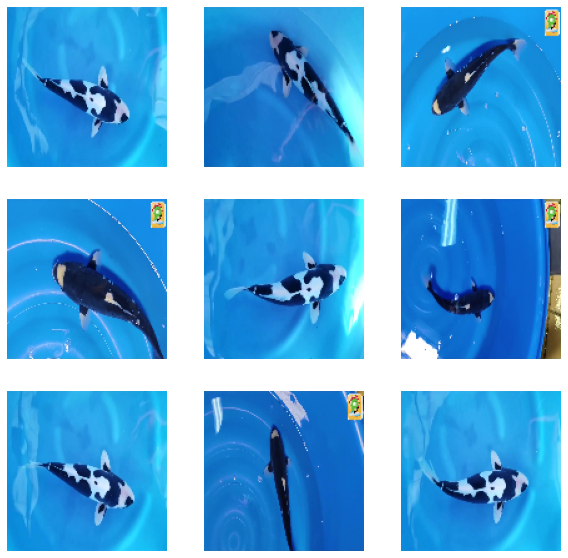

In [35]:
print('\t\t\t\tDoitsu_none')
plot_img(kumonryu_fewimg)

In [48]:
#tăng cường hình ảnh trong tệp train
#tăng cường kích thước, hướng ảnh.. để tăng dữ liệu đào tạo
training_dir = '/content/drive/MyDrive/AI/output/train'
training_datagen = ImageDataGenerator(
    rescale = 1./255, #normalization
    rotation_range = 40,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.2,
    zoom_range = 0.1,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [49]:
validation_dir = '/content/drive/MyDrive/AI/output/val'
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_dir = '/content/drive/MyDrive/AI/output/test'
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [50]:
train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (128,128), #rescale images to fixed size
    class_mode = 'categorical',
    batch_size = 32
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (128,128),
    class_mode = 'categorical',
    batch_size = 32
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128,128),
    class_mode = 'categorical',
    batch_size = 32
)

Found 5789 images belonging to 19 classes.
Found 721 images belonging to 19 classes.
Found 737 images belonging to 19 classes.


### MODEL

In [78]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(64, kernel_size=( 3, 3), input_shape = (128,128, 3), activation = 'relu',padding ='same'))
model.add(Conv2D(64, kernel_size=( 3, 3), activation = 'relu',padding ='same'))
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides=2))

# Adding a second convolutional layer
model.add(Conv2D(64,kernel_size=( 3, 3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size = (2, 2), strides=2))

model.add(Conv2D(128, kernel_size=( 3, 3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, kernel_size=( 3, 3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, kernel_size=( 3, 3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()




Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_71 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 128)     

In [80]:
epochs = 20
#model = model_from_scratch()
history1 = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2
                    )


Epoch 1/20
181/181 - 88s - loss: 1.4651 - accuracy: 0.5260 - val_loss: 1.2900 - val_accuracy: 0.5688 - 88s/epoch - 486ms/step
Epoch 2/20
181/181 - 88s - loss: 1.3050 - accuracy: 0.5816 - val_loss: 0.9681 - val_accuracy: 0.7000 - 88s/epoch - 484ms/step
Epoch 3/20
181/181 - 87s - loss: 1.1769 - accuracy: 0.6341 - val_loss: 1.1327 - val_accuracy: 0.6313 - 87s/epoch - 481ms/step
Epoch 4/20
181/181 - 88s - loss: 1.0501 - accuracy: 0.6785 - val_loss: 0.8188 - val_accuracy: 0.7688 - 88s/epoch - 484ms/step
Epoch 5/20
181/181 - 87s - loss: 0.9795 - accuracy: 0.6968 - val_loss: 0.6500 - val_accuracy: 0.7812 - 87s/epoch - 480ms/step
Epoch 6/20
181/181 - 88s - loss: 0.8753 - accuracy: 0.7343 - val_loss: 0.7253 - val_accuracy: 0.7437 - 88s/epoch - 488ms/step
Epoch 7/20
181/181 - 87s - loss: 0.7885 - accuracy: 0.7583 - val_loss: 0.5966 - val_accuracy: 0.8062 - 87s/epoch - 483ms/step
Epoch 8/20
181/181 - 87s - loss: 0.7285 - accuracy: 0.7758 - val_loss: 0.5251 - val_accuracy: 0.8062 - 87s/epoch - 479

NameError: ignored

In [81]:
#function to get accuracy and loss from history 
def get_history_data(history):
    
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  return train_acc,val_acc,train_loss,val_loss

In [83]:
train_acc,val_acc,train_loss,val_loss = get_history_data(history1)

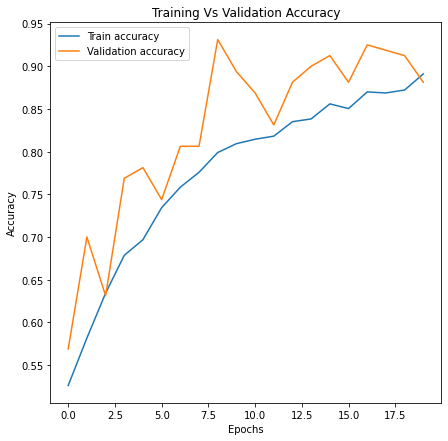

In [84]:
#plot Accuracy graph
epochs = range(len(train_acc))
plt.figure(figsize=(7,7));
plt.plot(epochs,train_acc,label ='Train accuracy');
plt.plot(epochs,val_acc,label ='Validation accuracy');
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Accuracy');

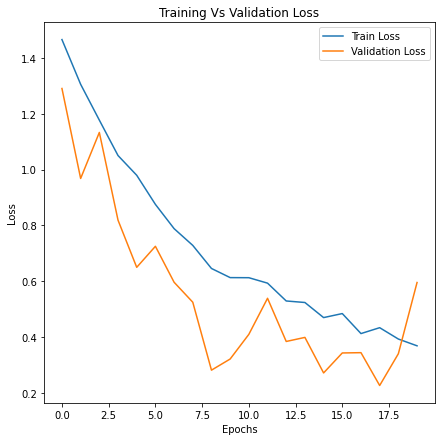

In [85]:
#plot validation graph
plt.figure(figsize=(7,7));
plt.plot(epochs,train_loss,label ='Train Loss');
plt.plot(epochs,val_loss,label ='Validation Loss');
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Loss');

In [ ]:
model.save('cakoi.h5')

In [87]:
#check how model performs on test data(unseen data)
model.evaluate(test_generator)

24/24 [==============================] - 9s 356ms/step - loss: 0.2268 - accuracy: 0.9281


[0.22681771218776703, 0.9280868172645569]

In [1]:
#load model
from keras import models
model = models.load_model('cakoi.h5')

In [2]:

import cv2
import numpy as np
import sys
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv



In [3]:
class_name=['0','BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


## Nhận diện qua video

In [13]:
cap = cv2.VideoCapture("../BAOCAOCUOIKI/test/videotancho/tancho.mp4")
#cap = cv2.VideoCapture(0)


while(True):

    ret, image_org = cap.read()
    if not ret:
        continue
    image_org = cv2.resize(image_org, dsize=None,fx=0.4,fy=0.4)
    image = image_org.copy()
    image = cv2.resize(image, dsize=(128,128))
    image = image.astype('float')*1./255
    image = np.expand_dims(image, axis=0)
    predict = model.predict(image)
    

    print(np.argmax(model.predict(image), axis=1))
    print(class_name[np.argmax(model.predict(image))])
    print(np.max(predict[0],axis=0))
    if (np.max(predict)>=0.8) and (np.argmax(predict[0])!=0):


        # Show image
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (50, 50)
        fontScale = 1.5
        color = (0, 255, 0)
        thickness = 2


        cv2.putText(image_org, class_name[np.argmax(model.predict(image))], org, font,
                    fontScale, color, thickness, cv2.LINE_AA)

    cv2.imshow("Picture", image_org)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[2]
CHAGOI
0.9927712
[2]
CHAGOI
0.9874756
[2]
CHAGOI
0.976848
[2]
CHAGOI
0.9708228
[2]
CHAGOI
0.99155265
[2]
CHAGOI
0.96060026
[2]
CHAGOI
0.9861303
[2]
CHAGOI
0.99533314
[2]
CHAGOI
0.9972703
[2]
CHAGOI
0.99343187
[2]
CHAGOI
0.98897773
[2]
CHAGOI
0.9454001
[2]
CHAGOI
0.7015858
[2]
CHAGOI
0.5373221


In [ ]:
#tắt máy ảnh khi bị đơ
cap.release()
cv2.destroyAllWindows()

## Nhận diện hình ảnh

[1]
BENIGOI
[[3.6331360e-21 9.9975878e-01 4.2317239e-10 1.2034256e-11 7.1774062e-05
  5.0723433e-08 1.2384643e-11 5.6970669e-07 5.3711505e-05 5.4513773e-08
  1.5885062e-08 1.5166714e-08 4.6136220e-12 1.8107069e-10 6.3635620e-05
  3.4619762e-11 5.1283652e-05 7.2143806e-09 1.3654730e-07]]
['0', 'BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


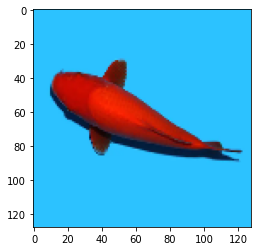

In [4]:
pic = image.load_img('../BAOCAOCUOIKI/benigoi4.jpg', target_size=(128,128))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
print(np.argmax(model.predict(pic), axis=1))
print(class_name[np.argmax(model.predict(pic))])
print(model.predict(pic))
print(class_name)

[2]
CHAGOI
[[1.1210265e-33 5.3112717e-13 1.0000000e+00 1.0604479e-18 6.0007890e-19
  1.9850833e-12 1.5084756e-09 2.7245481e-18 1.8864332e-18 2.5359803e-11
  2.3177497e-12 9.1998895e-17 2.9055209e-14 2.4849761e-15 2.3161588e-12
  2.0342279e-17 1.4739035e-12 3.3486214e-09 1.5594439e-13]]
['0', 'BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


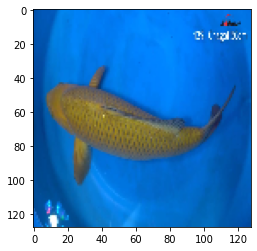

In [5]:
pic = image.load_img('../BAOCAOCUOIKI/output/test/chagoi/chagoi3 106.jpg', target_size=(128,128))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
print(np.argmax(model.predict(pic), axis=1))
print(class_name[np.argmax(model.predict(pic))])
print((model.predict(pic)))
print(class_name)

[3]
GOMO
[[2.38535887e-21 3.50510021e-08 6.07205944e-15 9.67292488e-01
  1.52530379e-08 3.32600321e-05 1.53011191e-04 3.89773661e-04
  2.15089512e-05 1.28006960e-07 1.81070784e-15 3.68138730e-15
  1.43179593e-10 1.23529419e-16 4.26350061e-06 3.30915245e-05
  4.59489704e-04 1.32317615e-08 3.16128582e-02]]
['0', 'BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


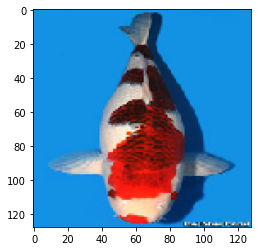

In [6]:
pic = image.load_img('../BAOCAOCUOIKI/BaoCao/output/test/Goromo/9810337.jpg', target_size=(128,128))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
print(np.argmax(model.predict(pic), axis=1))
print(class_name[np.argmax(model.predict(pic))])
print(model.predict(pic))
print(class_name)

[4]
HI_UTS 
['0', 'BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


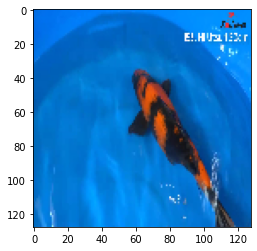

In [7]:
pic = image.load_img('../BAOCAOCUOIKI/BaoCao/output/test/Hi_Utsuri/Hi Utsuri 1 18.jpg', target_size=(128,128))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
print(np.argmax(model.predict(pic), axis=1))
print(class_name[np.argmax(model.predict(pic))])
print(class_name)

[7]
SHOWA
['0', 'BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


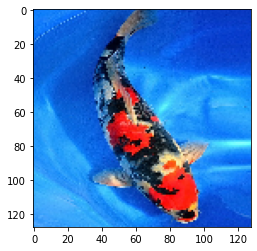

In [8]:
pic = image.load_img('../BAOCAOCUOIKI/test/showa-koi-fish.jpg', target_size=(128,128))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
print(np.argmax(model.predict(pic), axis=1))
print(class_name[np.argmax(model.predict(pic))])
print(class_name)

[9]
TANCHO
['0', 'BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


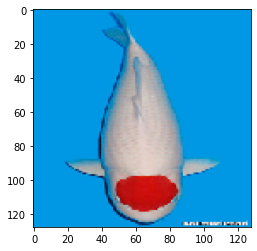

In [9]:
pic = image.load_img('../BAOCAOCUOIKI/BaoCao/output/test/Tancho/9483891.jpg', target_size=(128,128))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
print(np.argmax(model.predict(pic), axis=1))
print(class_name[np.argmax(model.predict(pic))])
print(class_name)

[16]
KUMONRYU
['0', 'BENIGOI', 'CHAGOI', 'GOMO', 'HI_UTS ', 'HIKARIMOYO', 'KIKUSUI', 'SHOWA', 'SHUSHUI', 'TANCHO', 'UTSU_KI', 'UTS_SHIRO', 'ASAGI', 'BEKKO', 'GOSHIKI', 'KOHAKU', 'KUMONRYU', 'OCHIBA', 'SANKE']


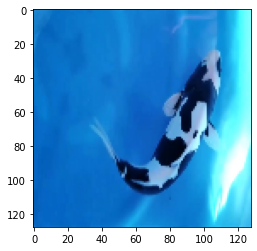

In [10]:
pic = image.load_img('../BAOCAOCUOIKI/BaoCao/output/test/kumonryu/KUMONRYU1 190.jpg', target_size=(128,128))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
print(np.argmax(model.predict(pic), axis=1))
print(class_name[np.argmax(model.predict(pic))])
print(class_name)